# Lab5

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Getting data](#data)
2. [Decision Tree fit](#dtc)
      1. [Train](#train)
      2. [Plotting decision tree](#plotting)
3. [Tree building](#building)
4. [Stop criterion](#criterion)
      1. [Max depth](#max_depth)
      2. [Max samples leaf](#max_samples)
      3. [Max leaf nodes](#max_nodes)
      4. [How to use it?](#how_to)
5. [P.S.](#ps)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 1. [Getting data](#chapters) <a class="anchor" id="data"></a>

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target
features = data.feature_names

df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
features = ['HouseAge', 'Population']
df = df[features + ['target']]
df = df.head(5)
X = df[features]
y = df['target']

# 2. [Decision Tree fit](#chapters) <a class="anchor" id="dtc"></a>

# 2.1 [Train](#chapters) <a class="anchor" id="train"></a>

In [4]:
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor()

# 2.2 [Plotting decision tree](#chapters) <a class="anchor" id="plotting"></a>

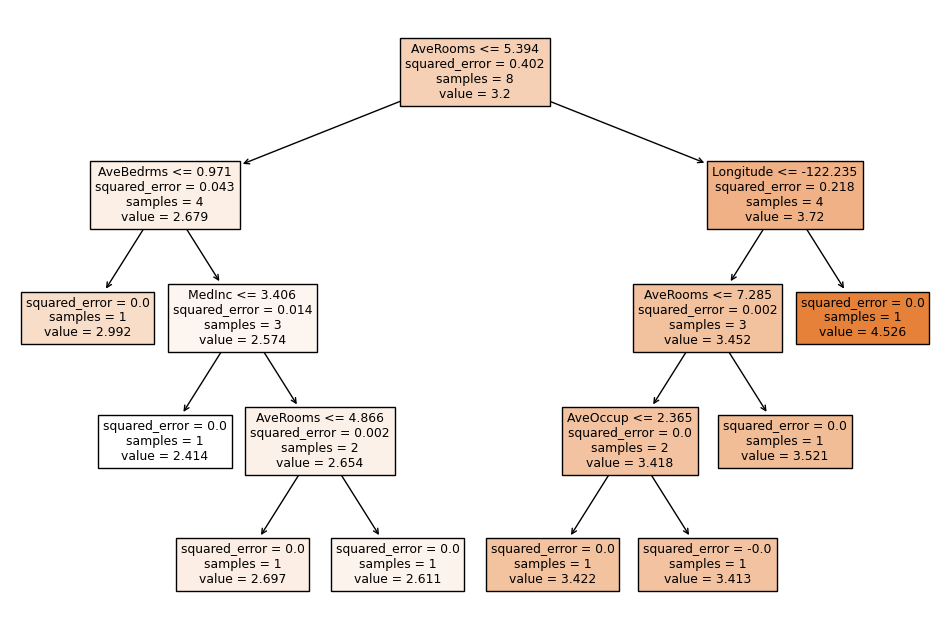

In [45]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, filled=True)
plt.show() # cut text output

# 3. [Tree building](#chapters) <a class="anchor" id="building"></a>

In [6]:
split_values = sorted(df.HouseAge.unique())
split_values

[21.0, 41.0, 52.0]

In [7]:
display(df[(df['HouseAge'] <= 21)], df[~(df['HouseAge'] <= 21)])

,HouseAge,Population,target
1,21.0,2401.0,3.585


,HouseAge,Population,target
0,41.0,322.0,4.526
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [8]:
display(df[(df['HouseAge'] <= 41)], df[~(df['HouseAge'] <= 41)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [9]:
display(df[(df['HouseAge'] <= 52)], df[~(df['HouseAge'] <= 52)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


,HouseAge,Population,target


In [26]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.square(y_true - y_pred))

def get_information_gain(df: pd.DataFrame, feature: list[str], split: int) -> float:
    df_left, df_right = df[(df[feature] <= split)], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root = mse(df['target'], df['target'].mean())
    mse_left = mse(df_left['target'], df_left['target'].mean())
    mse_right = mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
    print(f'Прирост информации при вопросе {feature} <= {split} равен {ig:.4f}')
    return ig

In [27]:
information_gains = {}
feature = 'HouseAge'

for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе HouseAge <= 21.0 равен 0.0029
Прирост информации при вопросе HouseAge <= 41.0 равен 0.0874


In [28]:
split_values = sorted(df.Population.unique())
feature = 'Population'

for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

max(information_gains, key=information_gains.get)

Прирост информации при вопросе Population <= 322.0 равен 0.1733
Прирост информации при вопросе Population <= 496.0 равен 0.0726
Прирост информации при вопросе Population <= 558.0 равен 0.0240
Прирост информации при вопросе Population <= 565.0 равен 0.0029


'Population <= 322.0'

# 4. [Stop criterion](#chapters) <a class="anchor" id="criterion"></a>

In [32]:
X = data.data
y = data.target
features = data.feature_names

df_full = pd.DataFrame(X, columns=features)
df_full['target'] = y

df_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


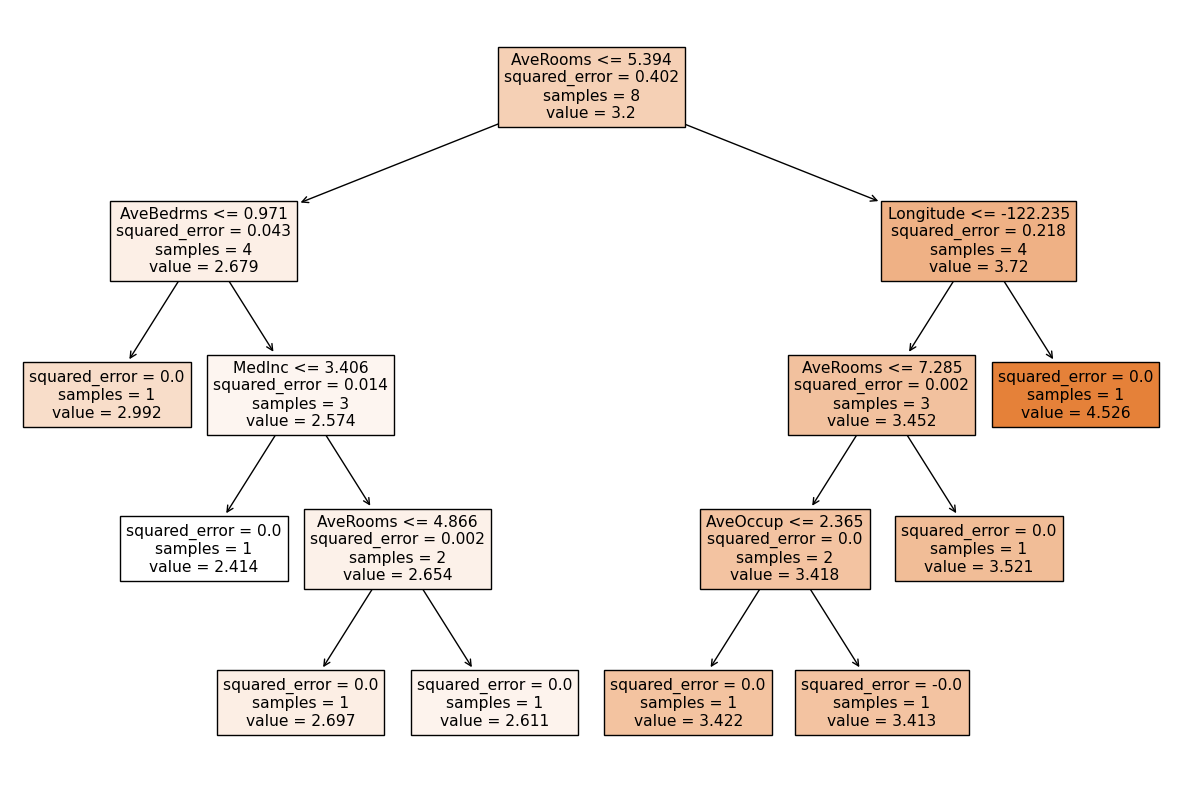

In [44]:
df = df_full.iloc[:10]

X_train, X_test, y_train, y_test = train_test_split(df[features],
                                                    df['target'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [36]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.45


## 4.1 [Max depth](#chapters) <a class="anchor" id="max_depth"></a>

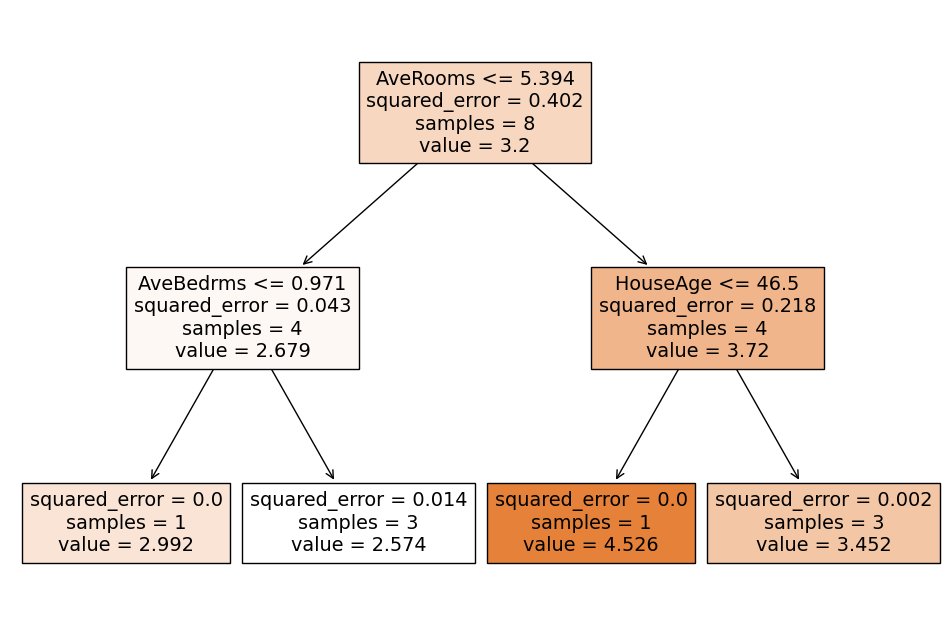

In [43]:
tree = DecisionTreeRegressor(random_state=42, max_depth=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, filled=True);
plt.show()

## 4.2 [Max samples leaf](#chapters) <a class="anchor" id="max_samples"></a>

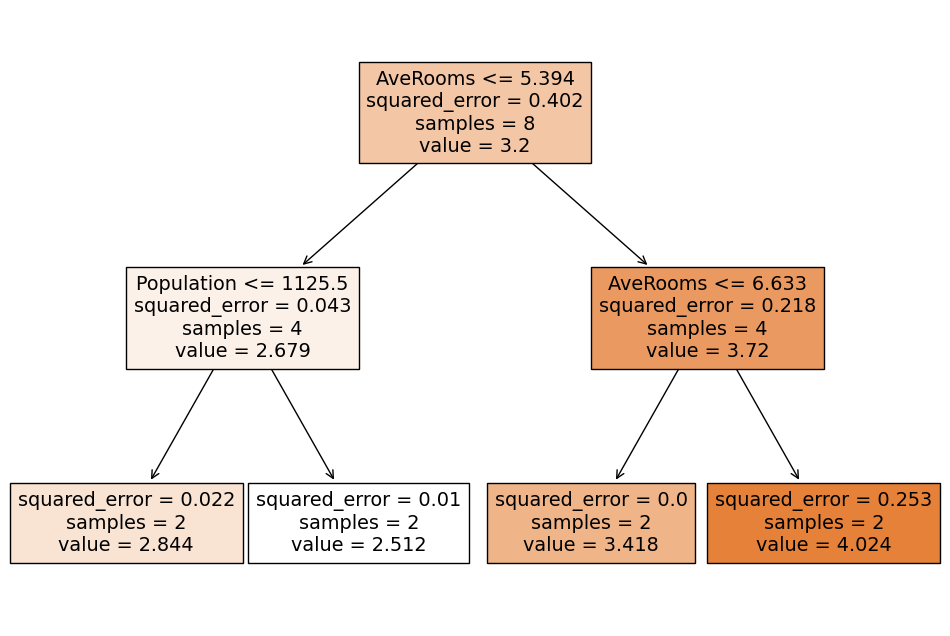

In [42]:
tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

## 4.3 [Max leaf nodes](#chapters) <a class="anchor" id="max_nodes"></a>

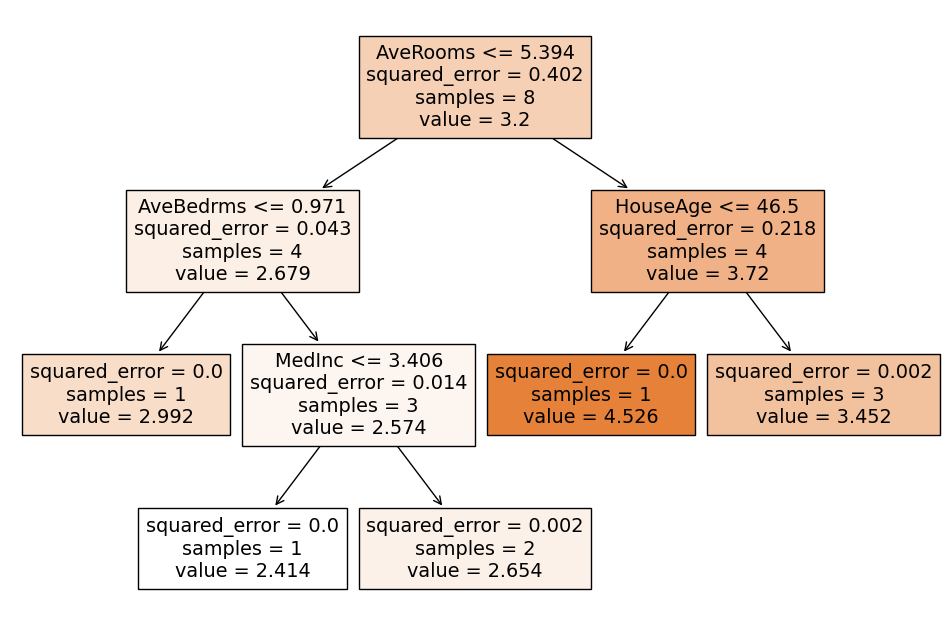

In [47]:
tree = DecisionTreeRegressor(random_state=42, max_leaf_nodes=5)
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

## 4.4 [How to use it?](#chapters) <a class="anchor" id="how_to"></a>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df_full[features],
    df_full['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [49]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')


MSE на обучении 0.00
MSE на тесте 0.52


In [50]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=None)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.04
MSE на тесте 0.50


In [51]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.19
MSE на тесте 0.40


In [52]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=15,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')


MSE на обучении 0.22
MSE на тесте 0.35


In [53]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=13,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.36


In [54]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=14,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.35


In [55]:
tree = DecisionTreeRegressor(random_state=42,
                             max_depth=14,
                             min_samples_leaf=24,
                             max_leaf_nodes=400)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.28
MSE на тесте 0.34


# [P.S.](#chapters) <a class="anchor" id="ps"></a>
Better use hyperparametr tunners like Optuna (Scikit-learn has Grid- and RandomSearch, but it is too "simple")

In [ ]:
# sth like that. Optuna not in requirements

# import optuna
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# data = fetch_california_housing()
# X_train = data.data
# y_train = data.target

# def objective(trial: optuna.trial.Trial) -> float:
#     train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=42)

#     param = {"random_state": 42,
#              "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 40),
#              "max_depth": trial.suggest_int("max_depth", 3, 20),
#              "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 5, 500)}

#     tree = DecisionTreeRegressor(**param)
#     tree.fit(train_x, train_y)
#     y_pred = tree.predict(val_x)
#     mse = mean_squared_error(val_y, y_pred)
#     return mse

# study = optuna.create_study(direction="minimize", pruner=optuna.pruners.HyperbandPruner())
# study.optimize(objective, n_trials=20)
# trial = study.best_trial

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))